In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [21]:
data = pd.read_excel(r'C:\Users\user\Downloads\Tweets.xlsx')

import re
# removing the pattern
def remove_pattern(input_text,pattern):
    r= re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i, '', input_text)
    return input_text
import numpy as np
data['tidy_tweet'] = np.vectorize(remove_pattern)(data['Tweet'],"@[\w]*") 
data['tidy_tweet'] = data['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")
data.head()



In [ ]:
#Preprocess the data
tweets = data['Tweet'].values
labels = data['Label'].values

# Convert labels to numerical values
labels = [(label) for label in labels]
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split the dataset into training and testing sets
tweets_train, tweets_test, labels_train, labels_test = train_test_split(tweets, labels, test_size=0.2, random_state=42)



In [22]:
# Tokenize the tweets
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweets_train)
vocab_size = len(tokenizer.word_index) + 1

# Convert text sequences to numerical sequences
sequences_train = tokenizer.texts_to_sequences(tweets_train)
sequences_test = tokenizer.texts_to_sequences(tweets_test)

# Pad the sequences to have the same length
max_length = 100  
padded_train = pad_sequences(sequences_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(sequences_test, maxlen=max_length, padding='post')

In [23]:
# Create the ANN model
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
# Train the model
model.fit(padded_train, labels_train, epochs=10, batch_size=16)

# Evaluate the model
_, accuracy = model.evaluate(padded_test, labels_test)
print('Accuracy:', accuracy)

Epoch 1/10
292/292 [==============================] - 49s 160ms/step - loss: 0.6539 - accuracy: 0.6445
Epoch 2/10
292/292 [==============================] - 58s 197ms/step - loss: 0.6520 - accuracy: 0.6453
Epoch 3/10
292/292 [==============================] - 58s 200ms/step - loss: 0.6512 - accuracy: 0.6453
Epoch 4/10
292/292 [==============================] - 61s 207ms/step - loss: 0.6510 - accuracy: 0.6453
Epoch 5/10
292/292 [==============================] - 61s 209ms/step - loss: 0.6507 - accuracy: 0.6453
Epoch 6/10
292/292 [==============================] - 62s 214ms/step - loss: 0.6510 - accuracy: 0.6453
Epoch 7/10
292/292 [==============================] - 57s 194ms/step - loss: 0.6509 - accuracy: 0.6453
Epoch 8/10
292/292 [==============================] - 58s 200ms/step - loss: 0.6510 - accuracy: 0.6453
Epoch 9/10
292/292 [==============================] - 57s 195ms/step - loss: 0.6506 - accuracy: 0.6453
Epoch 10/10
37/37 [==============================] - 3s 63ms/step - loss:

37/37 [==============================] - 2s 47ms/step


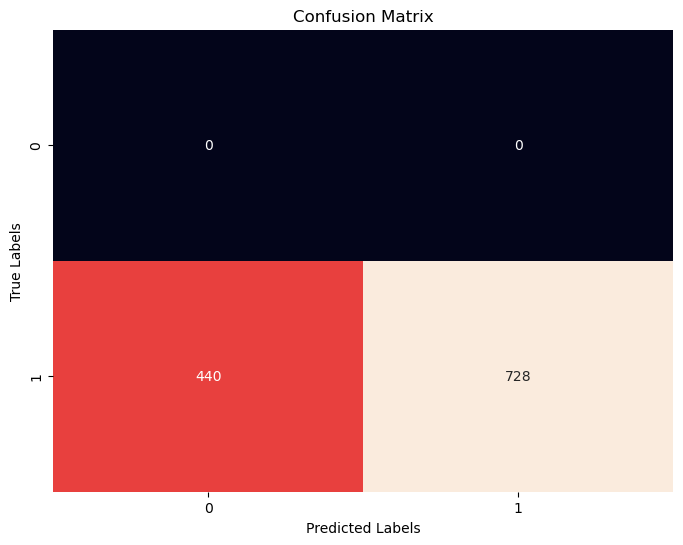

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       440
           1       0.62      1.00      0.77       728

    accuracy                           0.62      1168
   macro avg       0.81      0.50      0.38      1168
weighted avg       0.77      0.62      0.48      1168



In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
# Evaluate the model
probabilities = model.predict(padded_test)
predictions = (probabilities > 0.5).astype(int)
predicted_labels = label_encoder.inverse_transform(predictions.flatten())
true_labels = label_encoder.inverse_transform(labels_test)

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create classification report
report = classification_report(true_labels, predicted_labels, zero_division=1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm.T, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print classification report
print('Classification Report:')
print(report)